<a href="https://colab.research.google.com/github/VincentGranville/LearnCrunch/blob/main/Test2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Imports and read data**

In [ ]:
import csv 
from scipy.stats import norm
import numpy as np

filename = 'circle8d.csv' # make sure fields don't contain commas


In [ ]:
with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile)
    fields = next(reader) # Reads header row as a list
    rows = list(reader)   # Reads all subsequent rows as a list of lists


# **Create groups, here based on a single feature**

In [ ]:
#-- group by (Outcome)

groupCount = {}
groupList = {}
for obs in rows:
    group = 0  # no grouping 
    # obs[0] is clientID and is ignored
    if group in groupCount:
        cnt = groupCount[group]
        groupList[(group,cnt)]=(obs[0],obs[1],obs[2],obs[3],obs[4],obs[5],obs[6],obs[7],obs[8]) 
        groupCount[group] += 1    
    else:
        groupList[(group,0)]=(obs[0],obs[1],obs[2],obs[3],obs[4],obs[5],obs[6],obs[7],obs[8]) 
        groupCount[group] = 1

In [ ]:
#-- generate synthetic data customized to each group (Gaussian copula)

seed = 453
np.random.seed(seed)

OUT=open("circle8d_copula_synth.txt","w")
line=("ID\tX1\tX2\tX3\tX4\tX5\tX6\tX7\tX8\tOutcome\n")
OUT.write(line)

35

This is just a test

*   List item
*   List item
http://mltechniques.com





# **Main algorithm & output**

In [ ]:
for group in groupCount:
    nobs = groupCount[group]
    X1 = []
    X2 = []
    X3 = []
    X4 = []
    X5 = []
    X6 = []
    X7 = []
    X8 = []
    X9 = []
    for cnt in range(nobs):
        features = groupList[(group,cnt)]
        X1.append(float(features[0]))       
        X2.append(float(features[1]))       
        X3.append(float(features[2]))  
        X4.append(float(features[3]))   
        X5.append(float(features[4]))
        X6.append(float(features[5]))
        X7.append(float(features[6]))
        X8.append(float(features[7]))
        X9.append(float(features[8]))
    mu  = [np.mean(X1), np.mean(X2), np.mean(X3), np.mean(X4), np.mean(X5), np.mean(X6), np.mean(X7), np.mean(X8),np.mean(X1)] 
    zero = [0, 0, 0, 0, 0, 0, 0, 0, 0] 
    z = np.stack((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis = 0)
    # cov = np.cov(z)
    corr = np.corrcoef(z) # correlation matrix for Gaussian copula for this group

    print("------------------")
    print("\n\nGroup: ",group,"[",cnt,"obs ]\n") 
    print("means for X1 to X8: %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f\n" 
           % (mu[0],mu[1],mu[2],mu[3],mu[4],mu[5],mu[6],mu[7],mu[8]))  
    print("correlation matrix:\n")
    print(np.corrcoef(z),"\n")
    nobs_synth = nobs  # number of synthetic obs to create for this group
    gfg = np.random.multivariate_normal(zero, corr, nobs_synth) 
    g_X1 = gfg[:,0]
    g_X2 = gfg[:,1]
    g_X3 = gfg[:,2]
    g_X4 = gfg[:,3]
    g_X5 = gfg[:,4]
    g_X6 = gfg[:,5]
    g_X7 = gfg[:,6]
    g_X8 = gfg[:,7]
    g_X9 = gfg[:,8]

    # generate nobs_synth observations for this group
    print("synthetic observations:\n")

    for k in range(nobs_synth): 
  
        u_X1 = norm.cdf(g_X1[k])
        u_X2 = norm.cdf(g_X2[k])
        u_X3 = norm.cdf(g_X3[k])
        u_X4 = norm.cdf(g_X4[k])
        u_X5 = norm.cdf(g_X5[k])
        u_X6 = norm.cdf(g_X6[k])
        u_X7 = norm.cdf(g_X7[k])
        u_X8 = norm.cdf(g_X8[k])
        u_X9 = norm.cdf(g_X9[k])

        s_X1 = np.quantile(X1, u_X1)  # synthesized X1
        s_X2 = np.quantile(X2, u_X2)  # synthesized X2
        s_X3 = np.quantile(X3, u_X3)  # synthesized X3
        s_X4 = np.quantile(X4, u_X4)  # synthesized X4
        s_X5 = np.quantile(X5, u_X5)  # synthesized X5
        s_X6 = np.quantile(X6, u_X6)  # synthesized X6
        s_X7 = np.quantile(X7, u_X7)  # synthesized X7
        s_X8 = np.quantile(X8, u_X8)  # synthesized X8
        s_X9 = np.quantile(X9, u_X9)  # synthesized X9

        line = str(k)+"\t"+str(s_X1)+"\t"+str(s_X2)+"\t"+str(s_X3)+"\t"+str(s_X4)+"\t"
        line = line + str(s_X5)+"\t"+str(s_X6)+"\t"+str(s_X7)+"\t"+str(s_X8)+"\t"+str(s_X9)+"\n"
        OUT.write(line)
        print("%3d %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f" 
             %(k, s_X1, s_X2, s_X3, s_X4, s_X5, s_X6, s_X7, s_X8, s_X9))
OUT.close()

------------------


Group:  0 [ 399 obs ]

means for X1 to X8: 0.04 -0.01 0.04 -0.01 -0.11 0.01 -0.11 0.01 0.04

correlation matrix:

[[ 1.00000000e+00  6.40800789e-02  1.00000000e+00  6.40800789e-02
  -2.78278981e-02  2.72393263e-02 -2.78278981e-02  2.72393263e-02
   6.62441648e-02]
 [ 6.40800789e-02  1.00000000e+00  6.40800789e-02  1.00000000e+00
   8.28854173e-03 -1.62663789e-01  8.28854173e-03 -1.62663789e-01
  -1.02173706e-02]
 [ 1.00000000e+00  6.40800789e-02  1.00000000e+00  6.40800789e-02
  -2.78278981e-02  2.72393263e-02 -2.78278981e-02  2.72393263e-02
   6.62441648e-02]
 [ 6.40800789e-02  1.00000000e+00  6.40800789e-02  1.00000000e+00
   8.28854173e-03 -1.62663789e-01  8.28854173e-03 -1.62663789e-01
  -1.02173706e-02]
 [-2.78278981e-02  8.28854173e-03 -2.78278981e-02  8.28854173e-03
   1.00000000e+00  5.33395637e-02  1.00000000e+00  5.33395637e-02
  -7.07866863e-02]
 [ 2.72393263e-02 -1.62663789e-01  2.72393263e-02 -1.62663789e-01
   5.33395637e-02  1.00000000e+00  5.3339563

# **Adding some image**

Now displaying some correlation matrices saved as image `correl3.png` (uploaded in directory /content/ on Colab).

In [17]:
from google.colab.patches import cv2_imshow
from skimage import io

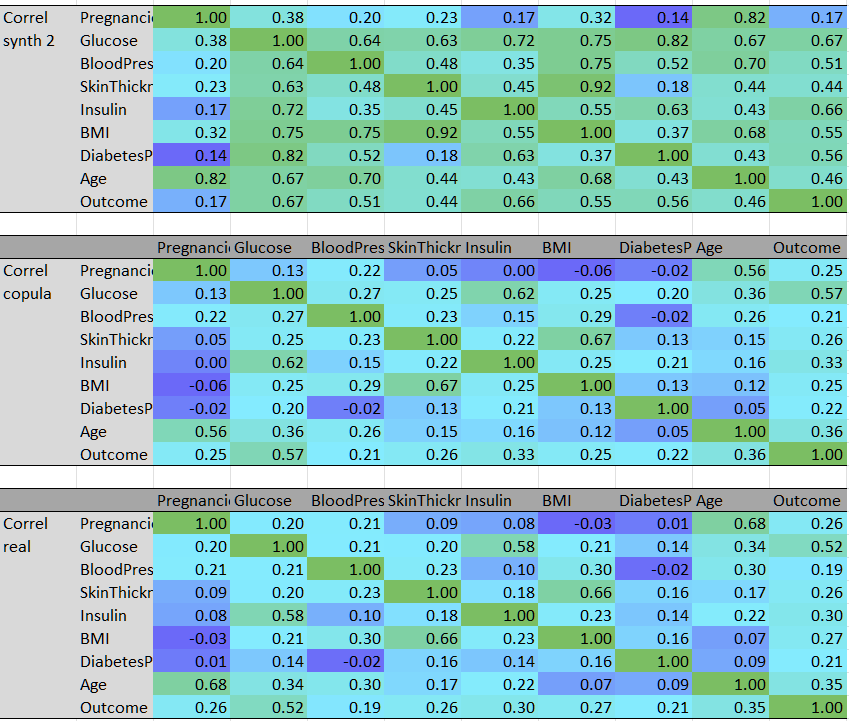

In [21]:
img_path = "correl3.png"
image = io.imread(img_path)
cv2_imshow(image)

# **One more image**

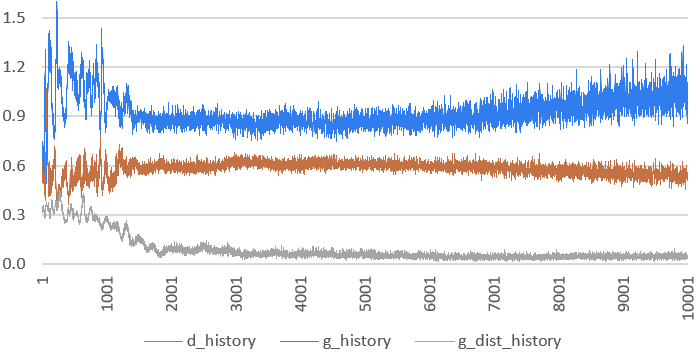

In [22]:
img_path = "gdist.png"
image = io.imread(img_path)
cv2_imshow(image)